# Exercise:
Get information from webpage with beautiful soup.

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://www.geeksforgeeks.org/python-web-scraping-tutorial/?ref=lbp
- https://github.com/html5lib/html5lib-python

- Get the links with pythonjob posts from from this page: https://realpython.github.io/fake-jobs/
- Visualize job types.
- (Optinal) Get another info from website you've choosen, If you have more time for this study.

# Solution:

In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = "https://realpython.github.io/fake-jobs/"
text = requests.get(url)

In [49]:
soup =  BeautifulSoup(text.content, 'html.parser')

In [10]:
type(soup)

bs4.BeautifulSoup

In [66]:
for link in soup.find_all('h2', class_='title is-5'):
    job_title = link.text
    if 'Python' in job_title:
        print(f"Python iş ilanı: {job_title.strip()}")

Python iş ilanı: Senior Python Developer
Python iş ilanı: Software Engineer (Python)
Python iş ilanı: Python Programmer (Entry-Level)
Python iş ilanı: Python Programmer (Entry-Level)
Python iş ilanı: Software Developer (Python)
Python iş ilanı: Python Developer
Python iş ilanı: Back-End Web Developer (Python, Django)
Python iş ilanı: Back-End Web Developer (Python, Django)
Python iş ilanı: Python Programmer (Entry-Level)
Python iş ilanı: Software Developer (Python)


In [65]:
# Find all job containers
job_containers = soup.find_all('div', class_='card')

# Create an empty list to store links
python_job_links = [] 

for job in job_containers:
    title = job.find('h2', class_='title is-5')
    if title and 'Python' in title.get_text():
        apply_link = job.find('a', class_='card-footer-item', string='Apply')
        if apply_link:
            python_job_links.append(apply_link['href'])

# Print the list of links
for link in python_job_links:
    print(link)

https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html
https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html
https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html
https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html
https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html
https://realpython.github.io/fake-jobs/jobs/python-developer-50.html
https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html
https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-70.html
https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-80.html
https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html


In [62]:
python_job_data = []
for job in job_containers:
    title = job.find('h2', class_='title is-5')
    
    # Check if title contains 'Python'
    if title and 'Python' in title.get_text():
        
        # Find the 'Apply' link
        apply_link = job.find('a', class_='card-footer-item', string='Apply')
        
        # If 'Apply' link is found, append data to the list
        if apply_link:
            job_title = title.get_text(strip=True)
            job_link = apply_link['href']
            python_job_data.append({'title': job_title, 'link': job_link})

# Print the list of links and titles
for job_data in python_job_data:
    print(f"Python iş ilanı: {job_data['title']} - Bağlantı: {job_data['link']}")

Python iş ilanı: Senior Python Developer - Bağlantı: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html
Python iş ilanı: Software Engineer (Python) - Bağlantı: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html
Python iş ilanı: Python Programmer (Entry-Level) - Bağlantı: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html
Python iş ilanı: Python Programmer (Entry-Level) - Bağlantı: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html
Python iş ilanı: Software Developer (Python) - Bağlantı: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html
Python iş ilanı: Python Developer - Bağlantı: https://realpython.github.io/fake-jobs/jobs/python-developer-50.html
Python iş ilanı: Back-End Web Developer (Python, Django) - Bağlantı: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html
Python iş ilanı: Back-End Web Developer (Pyth

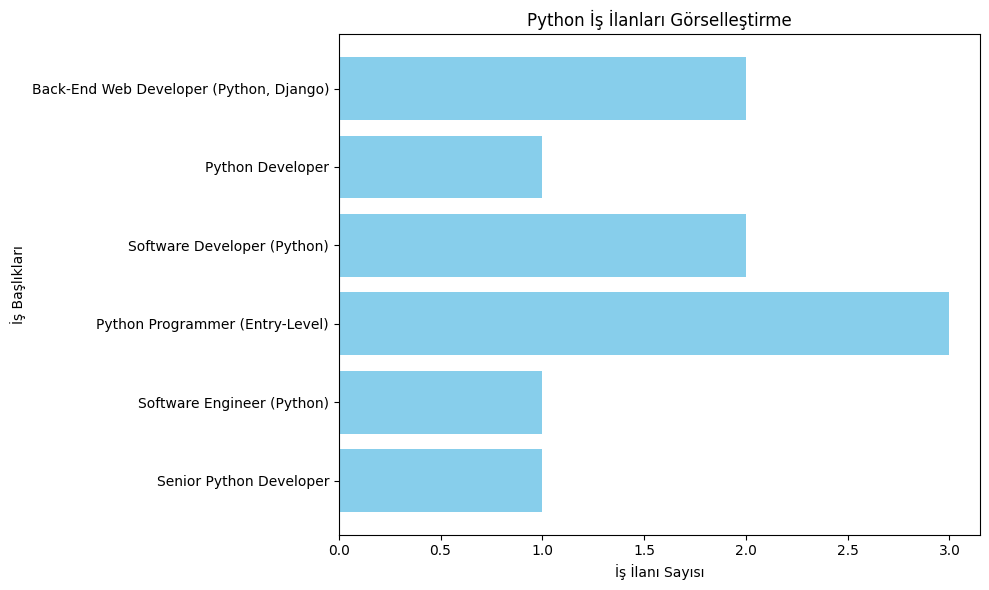

In [63]:
import matplotlib.pyplot as plt

job_titles = [job_data['title'] for job_data in python_job_data]
job_counts = {title: job_titles.count(title) for title in job_titles}

# Bar grafik oluştur
plt.figure(figsize=(10, 6))
plt.barh(list(job_counts.keys()), list(job_counts.values()), color='skyblue')
plt.xlabel('İş İlanı Sayısı')
plt.ylabel('İş Başlıkları')
plt.title('Python İş İlanları Görselleştirme')
plt.tight_layout()
plt.show()

In [68]:
# teachers solution
job_elements = soup.find_all("div", class_="card-content")

In [70]:
print(f"there are total {len(job_elements)} jobs:")
print("\n")

for num, job_element in enumerate(job_elements):
    title_element = job_element.find("h2", class_="title")
    company_element= job_element.find("h3", class_="company")
    location_element= job_element.find("p", class_="location")
    print(num+1)
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print("\n")


there are total 100 jobs:


1
Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA


2
Energy engineer
Vasquez-Davidson
Christopherville, AA


3
Legal executive
Jackson, Chambers and Levy
Port Ericaburgh, AA


4
Fitness centre manager
Savage-Bradley
East Seanview, AP


5
Product manager
Ramirez Inc
North Jamieview, AP


6
Medical technical officer
Rogers-Yates
Davidville, AP


7
Physiological scientist
Kramer-Klein
South Christopher, AE


8
Textile designer
Meyers-Johnson
Port Jonathan, AE


9
Television floor manager
Hughes-Williams
Osbornetown, AE


10
Waste management officer
Jones, Williams and Villa
Scotttown, AP


11
Software Engineer (Python)
Garcia PLC
Ericberg, AE


12
Interpreter
Gregory and Sons
Ramireztown, AE


13
Architect
Clark, Garcia and Sosa
Figueroaview, AA


14
Meteorologist
Bush PLC
Kelseystad, AA


15
Audiological scientist
Salazar-Meyers
Williamsburgh, AE


16
English as a second language teacher
Parker, Murphy and Brooks
Mitchellburgh, AE


17
Surgeo

In [71]:
python_jobs = soup.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

In [72]:
for job in python_jobs:
    print(job)

<h2 class="title is-5">Senior Python Developer</h2>
<h2 class="title is-5">Software Engineer (Python)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Software Developer (Python)</h2>
<h2 class="title is-5">Python Developer</h2>
<h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>
<h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Software Developer (Python)</h2>


In [73]:
for job in python_jobs:
    print(job.find_all('a'))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [74]:
python_job_elements=[
    h2_element.parent.parent.parent for h2_element in python_jobs
]

In [ ]:
for sibling in python_job_elements[0].next_siblings:
    print(sibling)

In [75]:
for job_element in python_job_elements:
    links = job_element.find_all('a')
    for link in links:
        print(link.text.strip()) 

Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply


In [76]:
for job_element in python_job_elements:
    links = job_element.find_all('a')
    for link in links:
        if link.text == 'Apply':
            print(link) 

<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-developer-50.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html" target="_blank">Apply</a>
<a class="card-footer

In [77]:
for job_element in python_job_elements:
    links = job_element.find_all('a')
    for link in links:
        if link.text == 'Apply':
            link_url = link["href"]
            print(f"Apply here: {link_url}\n") 

Apply here: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-developer-50.html

Apply here: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html

Apply here: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-70.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-80.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html



In [ ]:
jobs_list = []
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    job_title = title_element.text.strip()
    print(job_title)
    jobs_list.append(job_title)

In [ ]:
len(jobs_list)

In [ ]:
df = pd.DataFrame(jobs_list, columns = ['job_title'])

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df["job_title"].str.lower()

In [ ]:
df["job_title"].str.lower().str.contains("python")

In [79]:
df[df["job_title"].str.lower().str.contains("python")]

NameError: name 'df' is not defined

In [ ]:
location_list = []
for job_element in job_elements:
    location_element = job_element.find("p", class_="location")
    location = location_element.text.strip()
    print(location)
    location_list.append(location)

In [ ]:
location = pd.Series(location_list, name="location")

In [ ]:
df["location"] = location

In [ ]:
df.sample(5)